# Lab Segmentation 1

In [2]:
from commonfunctions import *
from skimage.filters import threshold_otsu
%matplotlib inline
%load_ext autoreload
%autoreload 2


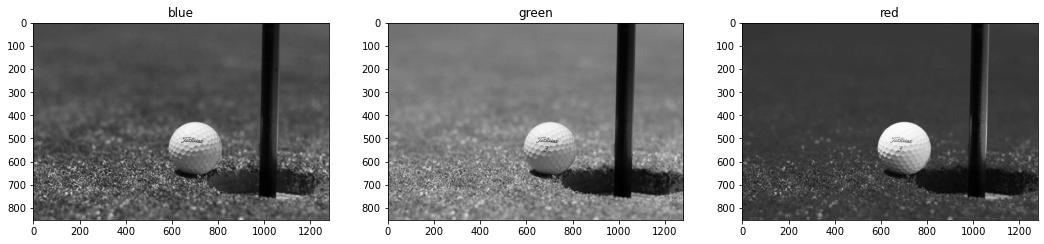

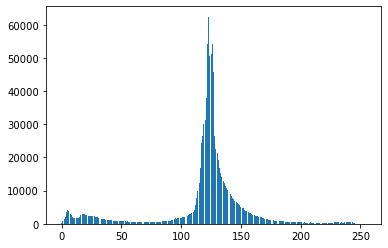

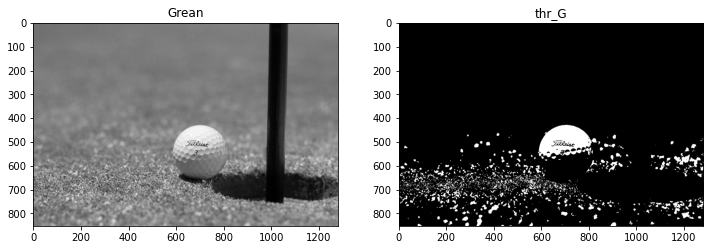

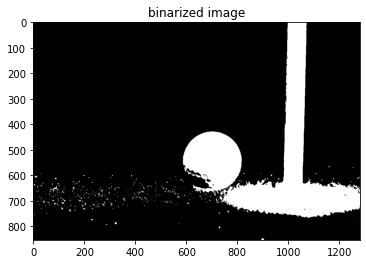

In [11]:
# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf
img = io.imread('imgs/exp1/golf.jpeg')
img = img.astype('float')
# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

show_images([B,G,R],['blue','green','red'])
# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
# green
# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)

showHist(G)
thr_G= np.where(G > 160,1,0);
show_images([G,thr_G],['Grean','thr_G'])

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold
for i in range(G.shape[0]):
    for j in range(G.shape[1]):
        if (G[i,j] > R[i,j]+5) and (G[i,j] > B[i,j]+5): 
            G[i,j] = 0
        else: 
            G[i,j] = 1
show_images([G],['binarized image'])

# 6- display the binarized image






In [131]:
# 1- Get the required RGB color (Using a color picker)


# 2- Read image
img = io.imread('imgs/exp2/cufe.png')
img = img.astype('float')
# 3- extract R, G and B channels (as float)
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]
# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
power_arr = np.full((B.shape),2)

# B_diff = B - 30
# G_diff = G - 91
# R_diff = R - 65
T_R , T_G, T_B = (45, 130, 25)
B_diff = B - T_B
G_diff = G - T_G
R_diff = R - T_R
# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)

dist = np.power(B_diff,2) + np.power(G_diff,2) + np.power(R_diff,2)
dist = np.sqrt(dist)



# 6-  create a mask by thresholding the differences
thr = 70
dist_thr = np.where(dist < thr,0,1 )

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
for i in range(img.shape[0]):
    for j in range(img.shape[1]): 
        if dist_thr[i,j] == 0 : 
            img[i,j] = [230,90,40]
# 8- show the image or save it
io.imsave('newimage.png', img)


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
